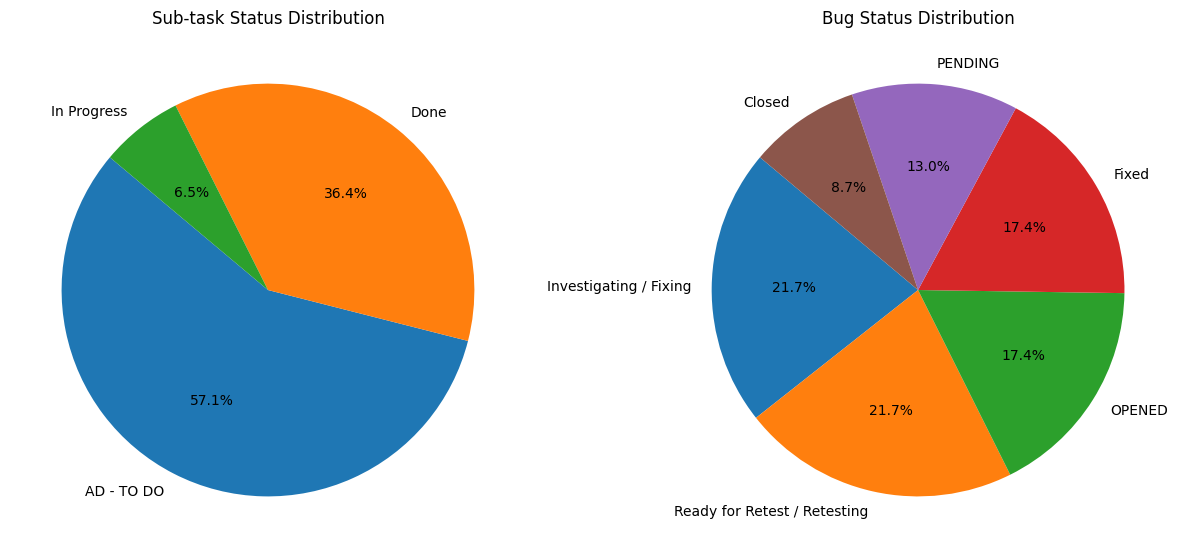

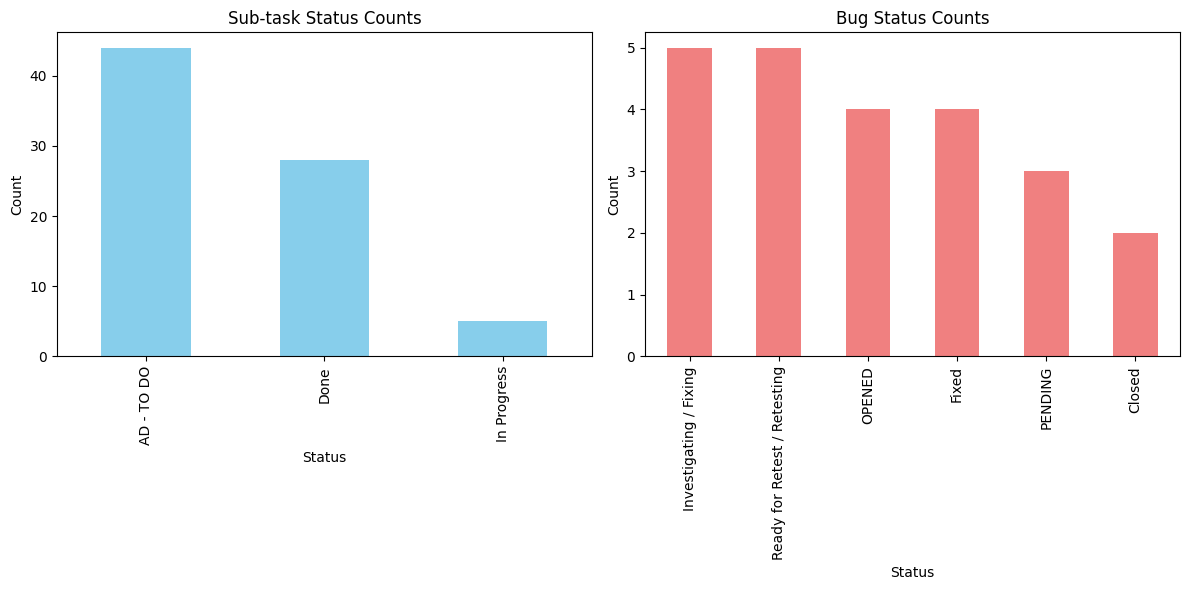

Summarize the status of user story ESO-167031
| Issue Key   | Parent User Story   | short_summary                     | Issue Type   | Status   | Environment   |
|:------------|:--------------------|:----------------------------------|:-------------|:---------|:--------------|
| ESO-167031  | ESO-163453          | [FE] - Code review of loan app... | Sub-task     | Done     | DEV           |
Which user stories have not Done yet? Provide their details
| Issue Key   | short_summary                     | Assignee              | Status      |
|:------------|:----------------------------------|:----------------------|:------------|
| ESO-168960  | [FE] - UI ENHANCEMENT -  REMAR... | chama.yangrungnon     | AD - TO DO  |
| ESO-168959  | [FE] - ENHANCE UI for LOAN REM... | anjajoh1              | In Progress |
| ESO-167733  | [FE] - New Section for …??…??…... | Anuwat Chaoyai        | In Progress |
| ESO-167729  | [BE] - Enhance Skip Plugin for... | Kunanon               | AD - TO DO  |
| ESO-

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import re

def check_negative_sentence(sentence):
    negative_words = ["not done", "incomplete", "pending", "not finished",'fail','failed']
    for phrase in negative_words:
        if phrase in sentence.lower():
            return True
            break

    return False
def analyze_issues(file_path):
    # Load the CSV file
    try:
        data = pd.read_csv(file_path)
    except Exception as e:
        print(f"Error reading the file: {e}")
        return

    # Validate required columns
    if 'Issue Type' not in data.columns or 'Status' not in data.columns:
        print("CSV file must contain 'Issue Type' and 'Status' columns.")
        return

    # Filter data by Issue Type
    sub_task_data = data[data['Issue Type'] == 'Sub-task']
    bug_data = data[data['Issue Type'] == 'Bug']

    # Get status counts for each Issue Type
    sub_task_status_counts = sub_task_data['Status'].value_counts()
    bug_status_counts = bug_data['Status'].value_counts()

    # Display Pie Chart for Sub-tasks
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.pie(sub_task_status_counts, labels=sub_task_status_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title("Sub-task Status Distribution")

    # Display Pie Chart for Bugs
    plt.subplot(1, 2, 2)
    plt.pie(bug_status_counts, labels=bug_status_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title("Bug Status Distribution")

    plt.tight_layout()
    plt.show()

    # Display Bar Chart
    plt.figure(figsize=(12, 6))

    # Bar chart for Sub-tasks
    plt.subplot(1, 2, 1)
    sub_task_status_counts.plot(kind='bar', color='skyblue')
    plt.title("Sub-task Status Counts")
    plt.xlabel("Status")
    plt.ylabel("Count")

    # Bar chart for Bugs
    plt.subplot(1, 2, 2)
    bug_status_counts.plot(kind='bar', color='lightcoral')
    plt.title("Bug Status Counts")
    plt.xlabel("Status")
    plt.ylabel("Count")

    plt.tight_layout()
    plt.show()

# Usage example
# Replace 'issues.csv' with the path to your CSV file
file_path = './assets/jira_issues.csv'
analyze_issues(file_path)

# Read the CSV file
data = pd.read_csv(file_path)
data['short_summary'] = data['Summary'].apply(lambda x: x[:30] + '...' if len(x) > 30 else x)

# Ensure the required columns exist
if "Environment" not in data.columns or "Status" not in data.columns:
    raise ValueError("CSV file must contain 'Environment' and 'Status' columns")


def test_result_bar_chart(env=None):
    # Group data by Environment and Status and count the occurrences
    grouped_data = data.groupby(["Environment", "Status"]).size().unstack(fill_value=0)
    if env:
      grouped_data = data[data['Environment'].str.lower() == env].groupby(["Environment", "Status"]).size().unstack(fill_value=0)

    # Plot the column chart
    grouped_data.plot(kind="bar", figsize=(10, 6))

    # Customize the chart
    title = f"Count of Status by Environment ({env.upper()})" if env else "Count of Status by Environment (All)"
    plt.title(title)
    plt.xlabel("Environment")
    plt.ylabel("Count")
    plt.legend(title="Status")
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Show the chart
    plt.show()

def test_result_pie_chart(env=None):
    """
    Generate a pie chart for test results based on their counts.
    """
    # Summarize the test results
    
    test_result_summary = data['Status'].value_counts()
    if env:
      test_result_summary = data[data['Environment'].str.lower() == env]["Status"].value_counts()
    # Generate the pie chart
    plt.figure(figsize=(8, 6))
    test_result_summary.plot.pie(
        autopct='%1.1f%%',
        startangle=90,
        colors=['#4CAF50', '#FF5722', '#2196F3', '#FFC107'],
        legend=True,
        ylabel='',
    )
    title = f"Test Results Distribution by Environment ({env.upper()})" if env else "Test Results Distribution by Environment (All)"
    plt.title(title)
    plt.show()
######################################################

def generate_summary(query):
    unique_environments = data['Environment'].dropna().unique()
    unique_environments_lower = [env.lower() for env in unique_environments]
    unique_test_results = data['Status'].dropna().unique()
    unique_test_results_lower = [result.lower() for result in unique_test_results]

    # Case 1: General summary of all environments
    if re.search(r"\bEnvironment\b", query.lower(), re.IGNORECASE):
        if re.search(r"\bPie\b", query.lower(), re.IGNORECASE):
            env_match = None
            for env in unique_environments_lower:
                if env in query.lower():
                    env_match = env
                    return test_result_pie_chart(env)
                    break  

            if env_match is None:
              return test_result_pie_chart()
        elif re.search(r"\bBar\b", query.lower(), re.IGNORECASE):
            env_match = None
            for env in unique_environments_lower:
                if env in query.lower():
                    env_match = env
                    return test_result_bar_chart(env)
                    break  

            if env_match is None:
              return test_result_bar_chart()
        # Case 1: General summary if no specific environment or result is mentioned
        elif not any(env in query.lower() for env in unique_environments_lower) and not any(result in query.lower() for result in unique_test_results_lower):
              environment_summary = (
                  data.groupby(['Environment', 'Status'])
                  .size()
                  .reset_index(name='Count')
              )
              return environment_summary
        else:
            # Case 2: Specific environment and/or test result
            filtered_data = data
            env_match = None
            result_match = None

            # Filter by environment
            for env in unique_environments_lower:
                if env in query.lower():
                    env_match = env
                    filtered_data = filtered_data[filtered_data['Environment'].str.lower() == env]
                    break

            # Filter by result
            for result in unique_test_results_lower:
                if result in query.lower():
                    result_match = result
                    filtered_data = filtered_data[filtered_data['Status'].str.lower() == result]
                    break

            # If no matching data is found
            if filtered_data.empty:
                return pd.DataFrame({'Message': ["No matching records found."]})

            # Summarize the filtered data
            summary = (
                filtered_data.groupby(['Environment', 'Status'])
                .size()
                .reset_index(name='Count')
            )
            return summary

    # If query doesn't match any conditions
    # return pd.DataFrame({'Message': ["No matching records found."]})

    # Check for test result summary
    if "status" in query.lower() and "user stories" in query.lower():
      return data.groupby(['Issue Key', 'short_summary']).agg({'Status': 'first'}).reset_index()

    match = re.search(r"user story (\w+-\d+)", query.lower())
    if match:
        user_story_id = match.group(1).upper()
        filtered_data = data[data['Issue Key'] == user_story_id]
        if filtered_data.empty:
            return pd.DataFrame({'Message': [f"No data available for User Story {user_story_id}."]})
        
        custom_columns =['Issue Key','Parent User Story','short_summary','Issue Type','Status','Environment']
        drop_columns = ['Assignee', 'Created Date','Priority','Summary']
        filtered_data = filtered_data[custom_columns].drop(columns=drop_columns, errors='ignore')
        return filtered_data

    if check_negative_sentence(query.lower()):
        if "user stories" in query.lower():
            custom_columns =['Issue Key','short_summary','Assignee','Status']
            not_tested = data[(data['Status'] != 'Done') & (data['Issue Type'] == 'Sub-task')]
            result = not_tested[custom_columns]
            return result

    return pd.DataFrame({'Message': ["Sorry, I couldn't understand the query. Please specify a valid column or user story."]})

def qa_generate(question):
    """
    Main QA function to handle queries for column or user story summaries.
    """
    summary = generate_summary(question)
    if isinstance(summary, pd.DataFrame):
        return summary.to_markdown(index=False)  # Convert DataFrame to markdown table
    return summary


# Sample questions
questions = [
#   "Please provide a detailed pie chart representation of the environment",
#   "Would you be able to present the environment’s details in a bar chart?",
#   "Can you visualize the SIT environment in a bar chart?",
#   "What is the status of DEV environment",
#   "List out the status of all user stories",
  "Summarize the status of user story ESO-167031",
  "Which user stories have not Done yet? Provide their details"
]
for question in questions:
    print(question)
    print(qa_generate(question))